In [1]:
library(haven)
library(ggplot2)
library(patchwork)
library(repr)
library(jtools)

Warning message:
"package 'patchwork' was built under R version 3.6.3"

In [2]:
econ_growth <- read_dta("data/ps2_CountryEconGrowth.dta")
tn_star <- read_dta("data/ps2data_TNStar.dta")

# Question #4: An Empirical Investigation of Economic Growth
### Variables:
| Variable      | Definition |
| :----------- | -----------: |
country_name | Name of country
growth | Average annual percentage growth of real GDP from 1960 to 1995
europe | =1 if country is in Europe
_ | =0 otherwise
yearsschool | Average number of years of schooling if adult residents in that country in 1960
assasinations | Average number of political assassinations in country from 1960 to 1995 (per million population)

### A. Preliminary analysis
a) Provide scatter plots for a country’s annual growth rate against the average
number of years of schooling and assassinations  
b) Based on the graphs in a), how do years of schooling and number of
assassinations appear to affect economic growth? 

In [3]:
p1 <- ggplot(econ_growth, aes(x=growth, y=assasinations)) +
geom_point(alpha = 0.8, color="royalblue", size=2.5)

p2 <- ggplot(econ_growth, aes(x=growth, y=yearsschool)) +
geom_point(alpha = 0.8, color="orange", size=2.5)

# scale visuals
options(repr.plot.width=10, repr.plot.height=5)

### a)

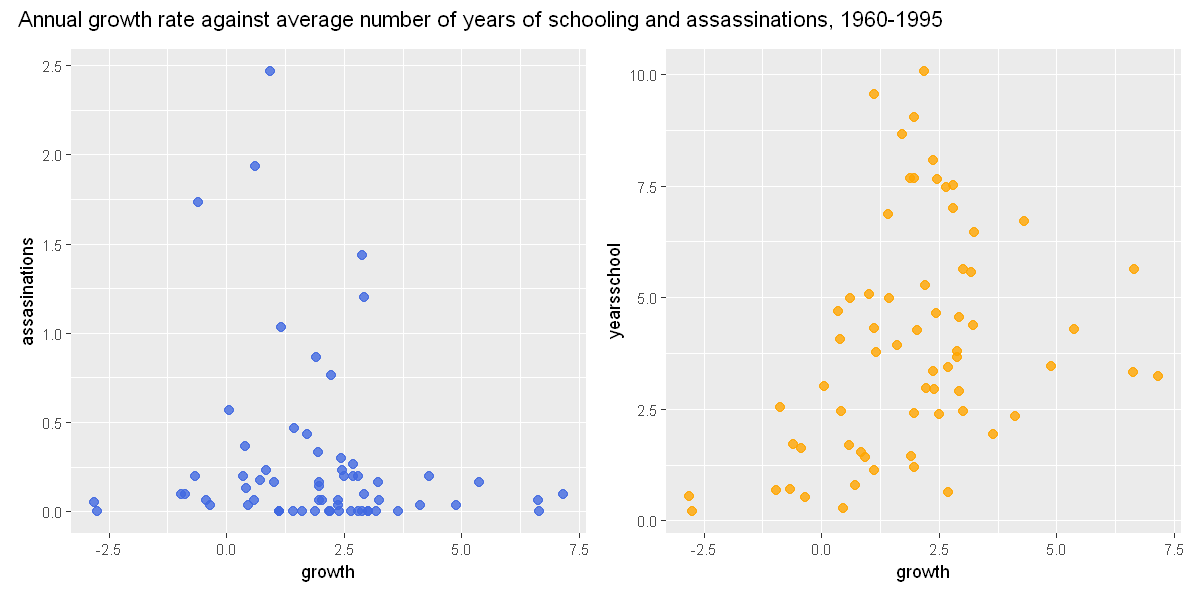

In [4]:
p1 + p2+ plot_annotation(
  title = "Annual growth rate against average number of years of schooling and assassinations, 1960-1995",
)

### b)

We can reach no conclusion regarding how either of these variable affect economic growth. However, we can conclude that yearsschool appears more correlated with economic growth than does assassinations

## 4 B. Bivariate regression  
### a)
Write the regression of growth on years of schooling in equation form. 
\begin{align}
\hat{yearsschool_i} = \beta_0 + \beta_1growth_i + \epsilon_i
\end{align}
### b)
What does the subscript i index here?  
**Answer:** The subscript $i$ indicates an index in each variable vector, AKA the row in each variable's column in the dataset  

### c)
Estimate the regression in a). Display the results in a table, including the Rsquared and the number of observations. 

In [5]:
bivariate_model <- lm(growth ~ yearsschool, data=econ_growth)
summ(bivariate_model, confint = TRUE, ci.width = .95, digits = 5)

deg_free <- dim(econ_growth)[1]-1
alpha = .025
t_crit <- qt(p = alpha, df = deg_free, lower.tail = TRUE)
cat("Also\nAt alpha=", alpha*2,"and d.f.=", deg_free, "T_crit=", t_crit)

MODEL INFO:
Observations: 65
Dependent Variable: growth
Type: OLS linear regression 

MODEL FIT:
F(1,63) = 7.75154, p = 0.00708
R² = 0.10956
Adj. R² = 0.09543 

Standard errors: OLS
-------------------------------------------------------------------
                       Est.      2.5%     97.5%    t val.         p
----------------- --------- --------- --------- --------- ---------
(Intercept)         0.95829   0.12207   1.79451   2.29007   0.02538
yearsschool         0.24703   0.06972   0.42433   2.78416   0.00708
-------------------------------------------------------------------

Also
At alpha= 0.05 and d.f.= 64 T_crit= -1.99773

### d) 
**intercept:** with an average number of years of schooling of adult residents in 1960 of 0 we would expect average annual economic growth to be 0.958%  
**slope:** A 1 year increase in average number of years of schooling of adult residents in 1960 is associated with a .247% increase in average annual economic growth  
  
\begin{align}
\hat{\beta_1} \text{  } 95\text{% CI} &= \left[0.079, 0.416\right] \\
H_0 : \hat{\beta_1} &= 0 \\
H_0 : \hat{\beta_1} &\neq 0 \\
\text{Given: }\\
t &= 2.929 \\
t_{critical} &= 1.998 \\
p &= 0.00473
\end{align}
We can reject the null hypothesis with over 99% confidence (p=0.004)

### e)

In [6]:
multivariate_model <- lm(growth ~ yearsschool + assasinations, data=econ_growth)
summ(multivariate_model, confint = TRUE, ci.width = .95, digits = 5)

MODEL INFO:
Observations: 65
Dependent Variable: growth
Type: OLS linear regression 

MODEL FIT:
F(2,62) = 4.29457, p = 0.01792
R² = 0.12168
Adj. R² = 0.09334 

Standard errors: OLS
------------------------------------------------------------------------
                          Est.       2.5%     97.5%     t val.         p
------------------- ---------- ---------- --------- ---------- ---------
(Intercept)            1.11847    0.21229   2.02465    2.46726   0.01639
yearsschool            0.23666    0.05769   0.41563    2.64330   0.01038
assasinations         -0.42824   -1.35382   0.49734   -0.92487   0.35862
------------------------------------------------------------------------

### f)
Controlling for political assasinations, the association between a country's economic growth and educational attainment is basically unchanged - $\hat{\beta_1} = 0.24703$, $p = 0.00473$ in the bivariate regression, versus $\hat{\beta_1} = 0.23666$, $p = 0.01014$ when controlling for assasinations. There is a slight decrease in slope, t value, and slight increase in p, but the association is still statistically significant.

# Question #5: The Determinants of Test Scores
| Variable      | Definition |
| :----------- | -----------: |
Experience | Years of total teacher experience
Mathscore | Total scaled math score (measured in points)
Freelunch | =1 if student is receiving a subsidized lunch, 0 else
Masters | =1 if the teacher has a master’s (MA), 0 else
Innercity | =1 if the student’s residence is located in the inner city 

## a)
\begin{align}
Mathscore_i = \beta_0 + \beta_1FreeLunch_i + \epsilon_i
\end{align}

In [7]:
bivariate_model_tn_star <- lm(mathscore ~ freelunch, data=tn_star)
summ(bivariate_model_tn_star, confint = TRUE, ci.width = .95, digits = 5)

MODEL INFO:
Observations: 5871
Dependent Variable: mathscore
Type: OLS linear regression 

MODEL FIT:
F(1,5869) = 368.91274, p = 0.00000
R² = 0.05914
Adj. R² = 0.05898 

Standard errors: OLS
---------------------------------------------------------------------------
                         Est.        2.5%       97.5%      t val.         p
----------------- ----------- ----------- ----------- ----------- ---------
(Intercept)         496.53937   494.89640   498.18234   592.46499   0.00000
freelunch           -23.21418   -25.58353   -20.84483   -19.20710   0.00000
---------------------------------------------------------------------------

## c)


In [8]:
omitted_var_model_tn_star <- lm(mathscore ~ freelunch + experience, data=tn_star)
summ(omitted_var_model_tn_star, confint = TRUE, ci.width = .95, digits = 5)

MODEL INFO:
Observations: 5850 (21 missing obs. deleted)
Dependent Variable: mathscore
Type: OLS linear regression 

MODEL FIT:
F(2,5847) = 207.69432, p = 0.00000
R² = 0.06633
Adj. R² = 0.06601 

Standard errors: OLS
---------------------------------------------------------------------------
                         Est.        2.5%       97.5%      t val.         p
----------------- ----------- ----------- ----------- ----------- ---------
(Intercept)         489.91026   487.34286   492.47766   374.07687   0.00000
freelunch           -22.72617   -25.09830   -20.35405   -18.78134   0.00000
experience            0.69399     0.48956     0.89841     6.65506   0.00000
---------------------------------------------------------------------------

## d)

In [9]:
multivar_model_tn_star <- lm(mathscore ~ freelunch + innercity, data=tn_star)
summ(multivar_model_tn_star, confint = TRUE, ci.width = .95, digits = 5)

MODEL INFO:
Observations: 5871
Dependent Variable: mathscore
Type: OLS linear regression 

MODEL FIT:
F(2,5868) = 200.68903, p = 0.00000
R² = 0.06402
Adj. R² = 0.06370 

Standard errors: OLS
---------------------------------------------------------------------------
                         Est.        2.5%       97.5%      t val.         p
----------------- ----------- ----------- ----------- ----------- ---------
(Intercept)         496.96859   495.32271   498.61447   591.92698   0.00000
freelunch           -19.98955   -22.61469   -17.36441   -14.92753   0.00000
innercity            -8.89976   -12.05348    -5.74604    -5.53213   0.00000
---------------------------------------------------------------------------